<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/regularization_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REGULARIZATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


In [2]:
from sklearn.datasets import make_moons

In [4]:
X,y = make_moons(100, noise=0.25, random_state=2)

In [6]:
X

array([[ 1.04051282e+00, -2.33491352e-02],
       [-5.54741398e-01,  1.27013832e+00],
       [-7.23715066e-02, -1.77901205e-01],
       [-4.71961272e-02,  1.21883595e+00],
       [ 9.13794475e-01,  8.59883240e-01],
       [ 5.41150127e-01,  6.95140255e-01],
       [ 7.03026094e-01, -2.57985072e-01],
       [-1.33401091e-01,  1.06959481e+00],
       [-1.14287718e-01,  8.97688273e-01],
       [ 1.01150903e+00,  8.49916582e-01],
       [ 2.12537198e+00,  5.08605794e-01],
       [ 1.70010780e+00,  7.16265767e-01],
       [ 1.55439712e+00, -8.60585592e-01],
       [ 5.55027808e-01,  5.76836247e-01],
       [ 1.15481964e+00, -1.43219905e-01],
       [ 2.86145607e-01,  1.32282616e+00],
       [ 4.89545211e-01,  2.91536879e-01],
       [-6.67796665e-01,  7.81730273e-01],
       [ 2.23453555e-01,  3.34602767e-02],
       [ 1.18698241e+00, -3.39029325e-01],
       [-6.08507947e-01,  4.54265298e-01],
       [ 8.29543872e-01,  7.39089646e-01],
       [ 1.13299058e+00, -2.62270185e-01],
       [-1.

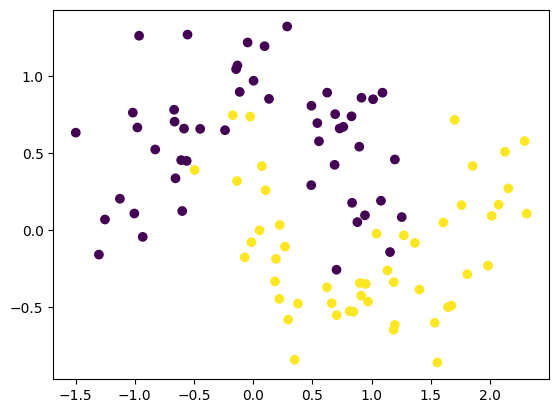

In [7]:
plt.scatter(x=X[:,0], y=X[:,1],c=y)
plt.show()

In [8]:
import torch
from torch import nn

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [13]:
X_train_tensor = torch.tensor(X_train, dtype = torch.float32)
X_test_tensor = torch.tensor(X_test, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test, dtype = torch.float32)

In [14]:
X_train_tensor.shape

torch.Size([80, 2])

## model without regularization

In [79]:
class ClassifierV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128,out_features=1),
        nn.Sigmoid()
    )

  def forward(self,x):
    return self.layer_stack(x)

In [80]:
mymodel1 = ClassifierV1()

In [81]:
total_params = sum(p.numel() for p in mymodel1.parameters() if p.requires_grad)
print(f"Total Trainable Parameters: {total_params}")

Total Trainable Parameters: 17025


ohh my gawd , 17000 parameters , ofc overfitting will take place

In [82]:
y_logits = mymodel1(X_train_tensor)
y_pred = y_logits.flatten()
y_pred.shape

torch.Size([80])

In [83]:
y_train.shape

(80,)

In [84]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel1.parameters(),
                             lr=0.01)

epochs = 2000
train_loss = []
test_loss = []
for i in range(epochs):
  mymodel1.train()

  y_logits = mymodel1(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel1.eval()

  with torch.inference_mode():
    y_logits = mymodel1(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())




In [85]:
from mlxtend.plotting import plot_decision_regions

In [86]:
 # Wrapper class for mlxtend
class MLxtendWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        with torch.no_grad():  # Disable gradient computation
            X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert to PyTorch tensor
            output = self.model(X_tensor)  # Get predictions
            return (output.numpy() > 0.5).astype(int).reshape(-1)



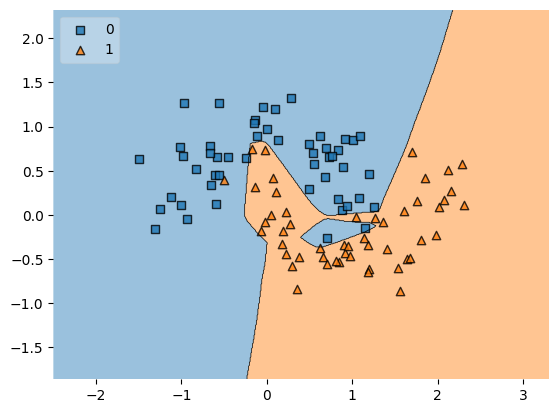

In [87]:
wrapped_model = MLxtendWrapper(mymodel1)

plot_decision_regions(X, y.astype('int'), clf=wrapped_model, legend = 2)
plt.show()

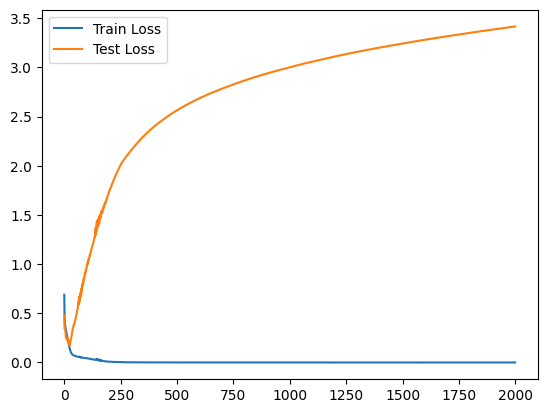

In [88]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.show()

Clearly overfitting is happening

## model with L2 regularization

In [89]:
# no need to make changes to the model architecture
# only change the optimizer a little

In [90]:
mymodel2 = ClassifierV1()

In [91]:
loss_fnc = nn.BCELoss()
optimizer = torch.optim.Adam(params = mymodel2.parameters(),
                             lr=0.01,
                             weight_decay=0.003)

epochs = 2000
train_loss = []
test_loss = []
for i in range(epochs):
  mymodel2.train()

  y_logits = mymodel2(X_train_tensor)
  y_pred = y_logits.flatten()

  loss = loss_fnc(y_pred, y_train_tensor)

  train_loss.append(loss.item())

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  mymodel2.eval()

  with torch.inference_mode():
    y_logits = mymodel2(X_test_tensor)
    y_pred = y_logits.flatten()

    loss = loss_fnc(y_pred, y_test_tensor)

    test_loss.append(loss.item())




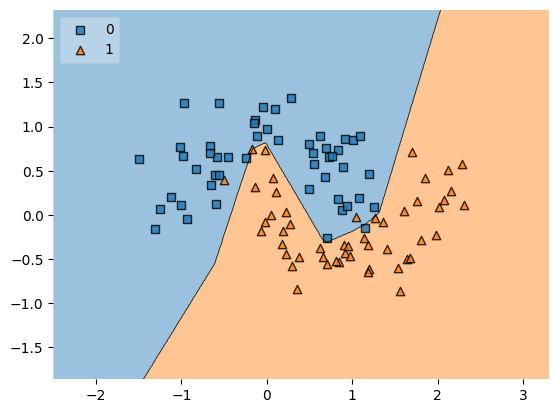

In [92]:
wrapped_model = MLxtendWrapper(mymodel2)

plot_decision_regions(X, y.astype('int'), clf=wrapped_model, legend = 2)
plt.show()

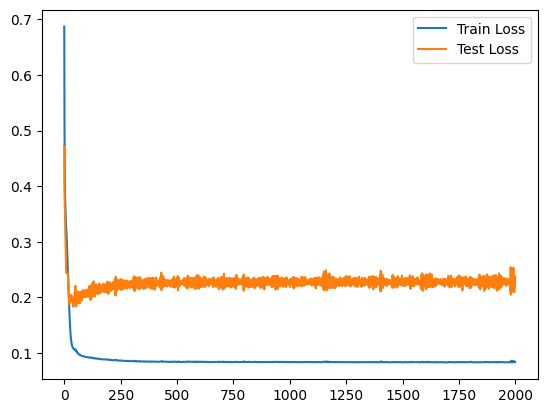

In [93]:
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.legend()
plt.show()

try to see what would happen if use use weight_decay = 0.03 ,

the model will start underfitting

In [94]:
# now this is how we can do regularization
# not let's see the impact of it on our weights

In [95]:

model_1_weight_layer_0 = mymodel1.layer_stack[0].weight
model_1_weight_layer_0.shape

torch.Size([128, 2])

In [96]:
# lets reshape it into 256
model_1_weight_layer_0 = model_1_weight_layer_0.reshape(256)
model_1_weight_layer_0.shape

torch.Size([256])

In [97]:
# similarly getting the weights of the first layer of model 2

model_2_weight_layer_0 = mymodel2.layer_stack[0].weight.reshape(256)
model_2_weight_layer_0.shape

torch.Size([256])

In [98]:
# we do torch.inference_mode():
# so as to set requires grad = false

In [99]:
import seaborn as sns

<Axes: >

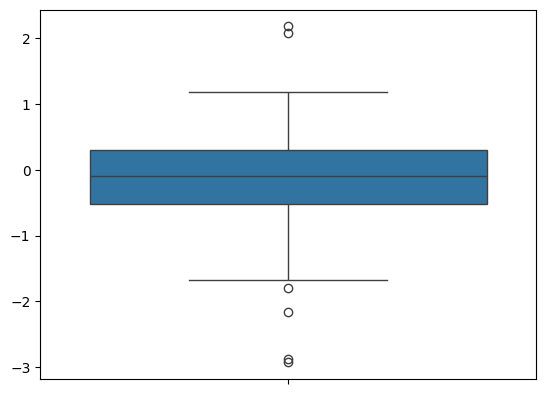

In [100]:
sns.boxplot(model_1_weight_layer_0.detach().numpy())

the weights lie between 4 and -3

<Axes: >

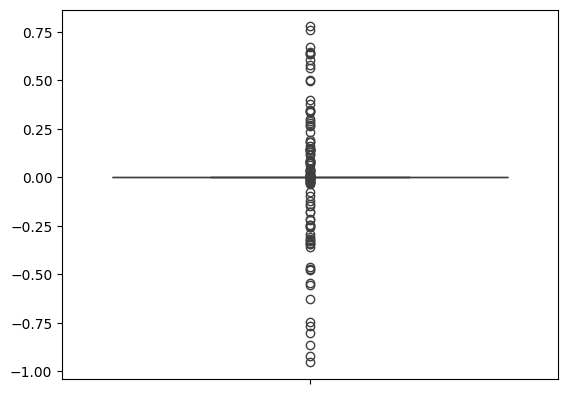

In [101]:
sns.boxplot(model_2_weight_layer_0.detach().numpy())

the weights lie between 0.8 and -0.8
so very small values

<ipython-input-102-49d093f41392>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_1_weight_layer_0.detach().numpy())
<ipython-input-102-49d093f41392>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_2_weight_layer_0.detach().numpy())


<Axes: ylabel='Density'>

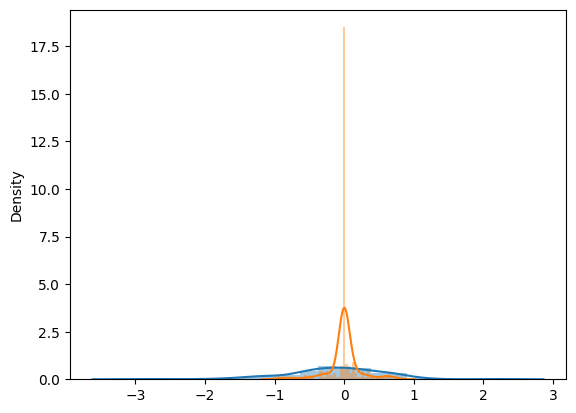

In [102]:
sns.distplot(model_1_weight_layer_0.detach().numpy())
sns.distplot(model_2_weight_layer_0.detach().numpy())

so clearly in 2nd model the values are accumulated near zero